In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from skimage import io
from skimage.color import *
import cv2
from my_commonfunctions import *
from tqdm import trange

# matplotlib.rcParams['figure.dpi'] = 200

In [2]:
def my_imread_gray(fname):
    img = io.imread(fname)
    if len(img.shape) == 2:
        return img
    elif img.shape[2] == 4:
        return rgb2gray(rgba2rgb(img))
    else:
        return rgb2gray(img)

In [25]:
test3_w2500_gray = (my_imread_gray('test3_w2500.png')*255).astype(np.uint8)
test3_w2500_gray_height = test3_w2500_gray.shape[0]
test3_w2500_bin_bg_white = test3_w2500_gray > 150


test3_gray = (my_imread_gray('test3.png')*255).astype(np.uint8)
test3_bin_bg_white = test3_gray > 150


Beethoven_gray = (my_imread_gray('Beethoven_Op026-01_001.png')).astype(np.uint8)
Beethoven_gray_height = Beethoven_gray.shape[0]
Beethoven_bin_bg_white = Beethoven_gray > 200

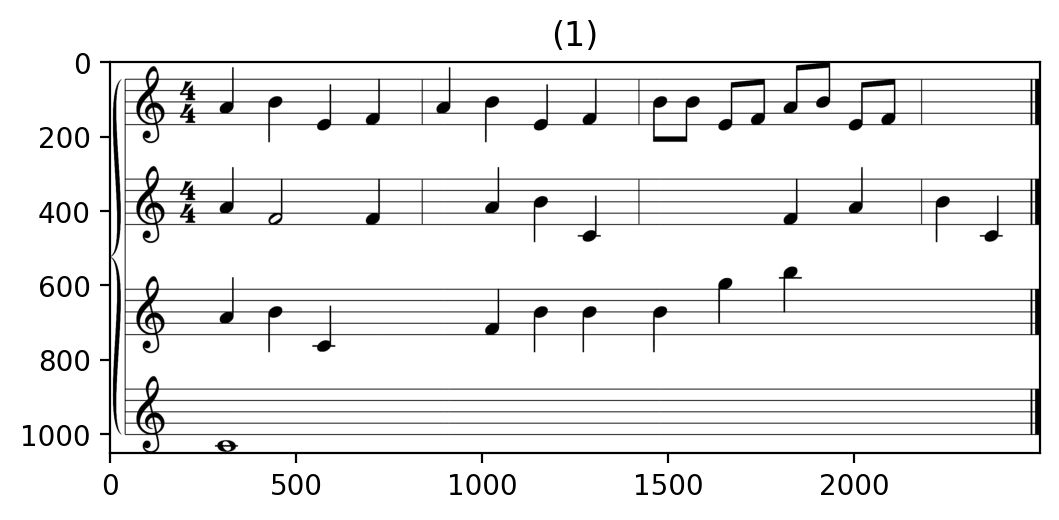

In [26]:
my_show_images([test3_w2500_gray], row_max=1)

In [20]:
flattened = test3_w2500_bin_bg_white.T.flatten()
#flattened = Beethoven_bin_bg_white.T.flatten()
flattened_indices = np.arange(0, flattened.shape[0], 1, np.uint32)
flattened[flattened_indices % test3_w2500_gray_height == 0] = False

In [21]:
image, contours, hierarchy = cv2.findContours((flattened*255).astype(np.uint8), 
                                              cv2.RETR_TREE, 
                                              cv2.CHAIN_APPROX_SIMPLE)

In [22]:
length_freq = np.zeros((test3_w2500_gray_height), dtype=np.uint32)
all_possible_lengths = np.arange(0, test3_w2500_gray_height, 1, dtype=np.uint32)
for i in contours:
    contour_y = i.T[1]
    #print(contour_y)
    length = contour_y[0][1] - contour_y[0][0] if len(contour_y[0]) == 2 else 1
    length_freq[length] += 1

In [23]:
all_possible_lengths[length_freq == length_freq.max()]

array([27], dtype=uint32)

<BarContainer object of 1050 artists>

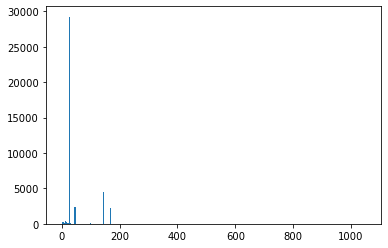

In [24]:
plt.bar(all_possible_lengths, length_freq, width=3)